**Task 1**

Conversion Rate Analysis Based on Income, Spending and Age

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('marketing_campaign_data.csv')

In [5]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


**Dataset Info**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [7]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Note :** terdapat satu buah kolom dengan missing value sebanyak 24 yaitu pada kolom income

In [8]:
df.shape

(2240, 30)

**Feature Engineering**

In [9]:
df.sample(5,random_state=1)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
779,779,10736,1971,S1,Lajang,72258000.0,0,1,12-09-2013,28,...,2,0,0,0,0,0,0,3,11,0
389,389,9799,1968,S3,Cerai,83664000.0,1,1,08-05-2013,57,...,5,0,0,0,0,0,0,3,11,0
510,510,9925,1981,S3,Bertunangan,39665000.0,1,0,25-05-2013,97,...,7,1,0,0,0,0,0,3,11,0
1553,1553,7321,1962,S1,Bertunangan,76081000.0,0,0,23-05-2014,85,...,2,0,0,0,1,0,0,3,11,0
1172,1172,8278,1990,S3,Menikah,74214000.0,0,0,26-08-2012,3,...,5,0,0,0,0,0,0,3,11,0


In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2022 - df['Year_Birth']
df['Join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['Total_kids'] > 0, 1, 0)

# Pengelompokan Golongan berdasarkan Usia
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'Age_range'] = 'Children'
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'Age_range'] = 'Teens'
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'Age_range'] = 'Young adults'
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'Age_range'] = 'Middle age adults'
df.loc[(df['Age'] >= 55), 'Age_range'] = 'Older Man/adults'

# Total Belanja
df['Total_amount_spent'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# total campaign yang diterima
df['Total_accept_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# total asumsi transaksi yang dibeli
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
# CVR 
df['Conversion_rate'] = df.apply(lambda x: safe_div(x['Total_transactions'],x['NumWebVisitsMonth']), axis=1)

**EDA : Based on CVR on Income, Spending, and Age**

In [11]:
# Memisahkan Tipe Data

cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

num_cols = num.columns.to_list()
cat_cols = cat.columns.to_list()


In [12]:
#Numerikal Fitur

df[num_cols].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Age,Join_at_age,Total_kids,is_parents,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [13]:
#Kategorikal Fitur

df[cat_cols].describe()

,Education,Marital_Status,Age_range
count,2240,2240,2240
unique,5,6,3
top,S1,Menikah,Middle age adults
freq,1127,864,1139


<AxesSubplot:>

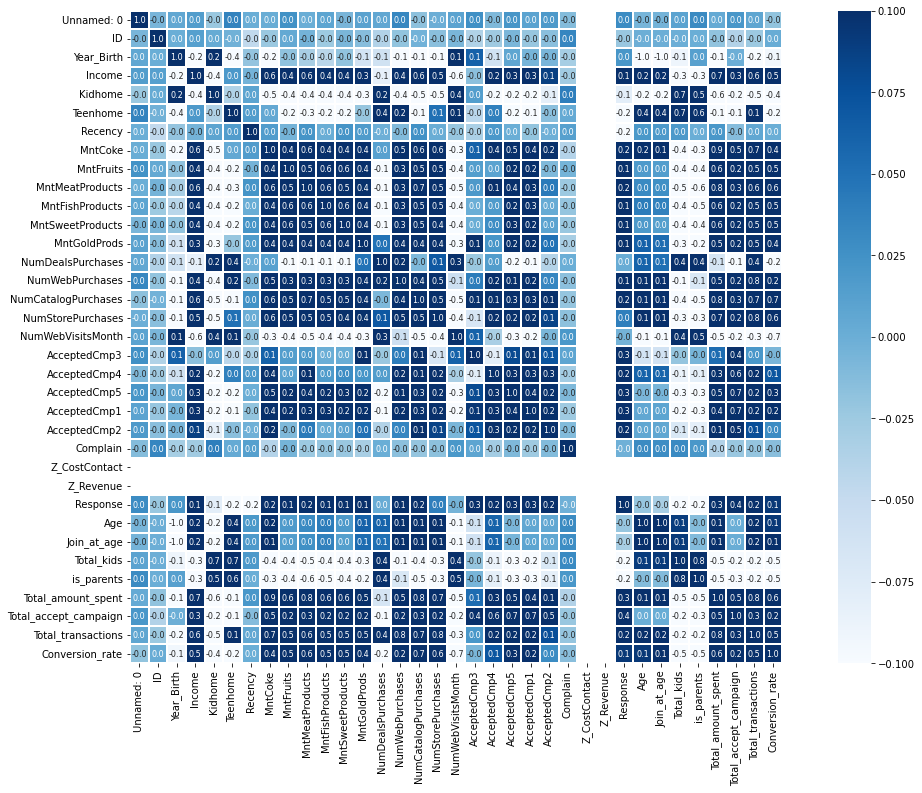

In [14]:
# Korelasi antar kolom dengan heatmap

plt.figure(figsize=(20, 12))
corrmap = df.corr()
sns.heatmap(corrmap, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmap.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

 - Fitur CVR memiliki korelasi tinggi dengan kolom / fitur income dan total amount spent
 - Fitur CVR memiliki korelasi lemah positf dengan fitur age

**Income vs Total Amount Spent**

(0.0, 120000000.0)

<Figure size 1080x504 with 0 Axes>

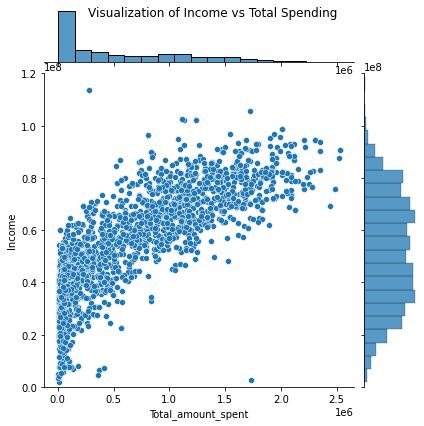

In [15]:
title = 'Visualization of Income vs Total Spending'
plt.figure(figsize=(15,7)) 
plot = sns.jointplot(x=df["Total_amount_spent"], y=df["Income"])
plt.suptitle(title)
plot.ax_marg_y.set_ylim(0, 120000000)

- Terjadi korelasi sebaran secara postif di kedua fitur yaitu total income dan Total Amount Spend

**Income vs CVR**

(0.0, 120000000.0)

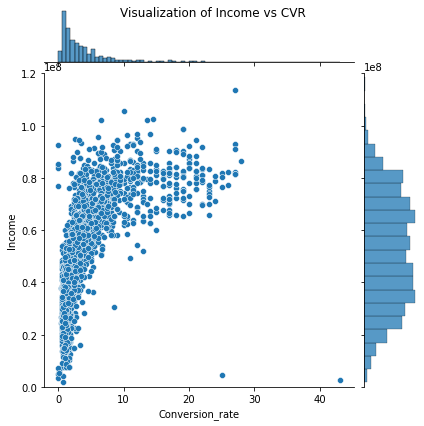

In [16]:
title = 'Visualization of Income vs CVR'
plot = sns.jointplot(x=df["Conversion_rate"], y=df["Income"])
plt.suptitle(title)
plot.ax_marg_y.set_ylim(0, 120000000)

**Age vs Total Amount Spent & Income**

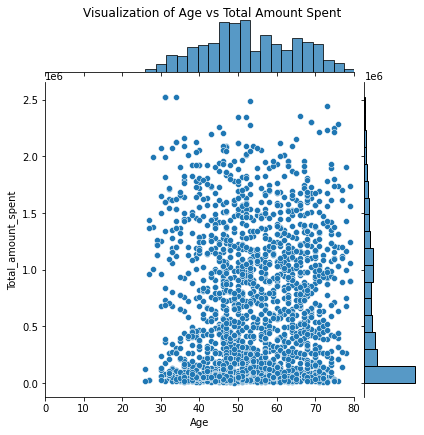

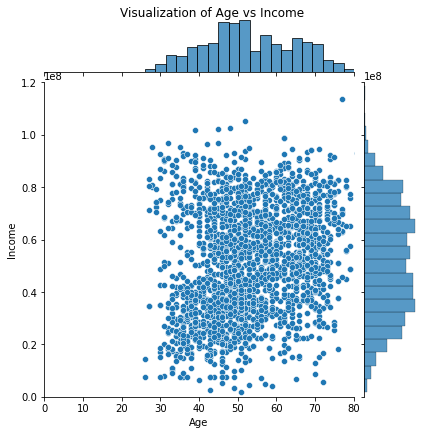

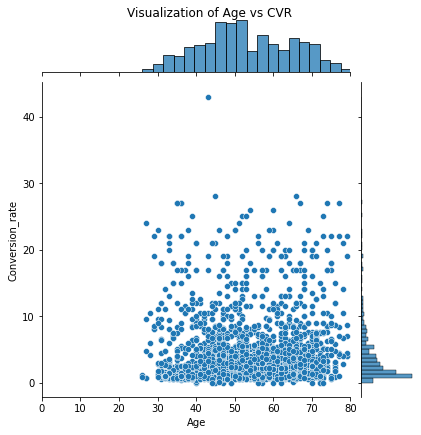

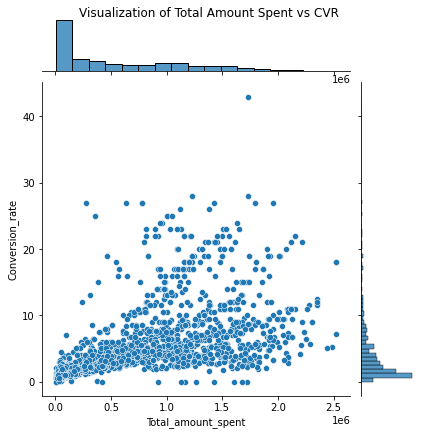

In [17]:
title = 'Visualization of Age vs Total Amount Spent'
plot = sns.jointplot(x=df["Age"], y=df["Total_amount_spent"])
plt.suptitle(title,y=1)
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

title = 'Visualization of Age vs Income'
plot = sns.jointplot(x=df["Age"], y=df["Income"])
plt.suptitle(title,y=1)
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

title = 'Visualization of Age vs CVR'
plot = sns.jointplot(x=df["Age"], y=df["Conversion_rate"])
plt.suptitle(title,y=1)
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

title = 'Visualization of Total Amount Spent vs CVR'
plot = sns.jointplot(x=df["Total_amount_spent"], y=df["Conversion_rate"])
plt.suptitle(title,y=1)
# plot.ax_marg_x.set_xlim(0, 80)
plt.show()

- Dari Visualisasi diatas terlihat fitur umur memiliki korelasi rendah terhadap 3 Fitur yang ada yaitu Total Amount, Income, dan CVR

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2240 non-null   int64         
 1   ID                     2240 non-null   int64         
 2   Year_Birth             2240 non-null   int64         
 3   Education              2240 non-null   object        
 4   Marital_Status         2240 non-null   object        
 5   Income                 2216 non-null   float64       
 6   Kidhome                2240 non-null   int64         
 7   Teenhome               2240 non-null   int64         
 8   Dt_Customer            2240 non-null   datetime64[ns]
 9   Recency                2240 non-null   int64         
 10  MntCoke                2240 non-null   int64         
 11  MntFruits              2240 non-null   int64         
 12  MntMeatProducts        2240 non-null   int64         
 13  Mnt

**TASK 2**

**Data Cleansing & Preprocessing**

In [19]:
df.isna().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Join_at_age               0
Total_kids                0
is_parents                0
Age_range                 0
Total_amount_spent  

**Task 2**

**Data Cleansing & Data Preprocessing**

Cek Data Null

In [20]:
df.isna().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Join_at_age               0
Total_kids                0
is_parents                0
Age_range                 0
Total_amount_spent  

Cek Data Duplikat

In [21]:
df.duplicated().any()

False

Handling Missing Value

In [22]:
df = df.dropna()

In [23]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntCoke                  0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Join_at_age              0
Total_kids               0
is_parents               0
Age_range                0
Total_amount_spent       0
Total_accept_campaign    0
T

Drop Data yang tidak diperlukan

In [24]:
df = df.drop(columns=['Unnamed: 0', 'Recency', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'])

In [25]:
df.shape

(2216, 33)

**Feature Encoding**

In [26]:
for col in cat_cols:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column Age_range
Middle age adults    1127
Older Man/adults      943
Young adults          146
Name: Age_range, dtype: int64
------------------------------ 



handling kolom education dengan label encoder

In [27]:
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)

In [28]:
dataset_categorical = df[['Education']].copy()

handling kolom marital status, age range , dan is parent dengan one hot

In [29]:
for cat in ['Marital_Status', 'Age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_categorical = dataset_categorical.join(onehots)

**Standarization Data**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2216 non-null   int64  
 1   Education              2216 non-null   object 
 2   Marital_Status         2216 non-null   object 
 3   Income                 2216 non-null   float64
 4   Kidhome                2216 non-null   int64  
 5   Teenhome               2216 non-null   int64  
 6   MntCoke                2216 non-null   int64  
 7   MntFruits              2216 non-null   int64  
 8   MntMeatProducts        2216 non-null   int64  
 9   MntFishProducts        2216 non-null   int64  
 10  MntSweetProducts       2216 non-null   int64  
 11  MntGoldProds           2216 non-null   int64  
 12  NumDealsPurchases      2216 non-null   int64  
 13  NumWebPurchases        2216 non-null   int64  
 14  NumCatalogPurchases    2216 non-null   int64  
 15  NumS

In [31]:
df.shape

(2216, 34)

import standar scaler dan standarisasi data

In [33]:
cat = df.select_dtypes(include='object')
num = df.select_dtypes(exclude='object')

num_cols = num.columns.to_list()
cat_cols = cat.columns.to_list()

In [35]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in num_cols:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head(5))

(2216, 34)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped
0,-0.019809,S1,Lajang,0.234063,-0.823039,-0.928972,0.978226,1.549429,1.690227,2.454568,...,0.986443,0.897752,-1.264803,-1.581389,Older Man/adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,-1.051009,S1,Lajang,-0.234559,1.039938,0.909066,-0.872024,-0.637328,-0.717986,-0.651038,...,1.236801,1.313688,1.405806,0.632356,Older Man/adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,-0.445526,S1,Bertunangan,0.769478,-0.823039,-0.928972,0.358511,0.569159,-0.178368,1.340203,...,0.318822,0.315443,-1.264803,-1.581389,Older Man/adults,0.280250,-0.439265,0.797881,0.175797,-0.457733
3,0.182737,S1,Bertunangan,-1.017239,1.039938,-0.928972,-0.872024,-0.561922,-0.655551,-0.504892,...,-1.266777,-1.181925,0.070501,0.632356,Middle age adults,-0.919224,-0.439265,-0.897205,-0.625532,-0.457733
4,-0.081373,S3,Menikah,0.240221,1.039938,-0.928972,-0.391671,0.418348,-0.218505,0.152766,...,-1.016420,-0.932363,0.070501,0.632356,Middle age adults,-0.307044,-0.439265,0.537099,-0.120865,1.533113


In [36]:
df_scaled.describe()

,ID,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,Join_at_age,Total_kids,is_parents,Total_amount_spent,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped
count,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,...,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03,2.216000e+03
mean,7.915850e-17,1.084265e-16,-2.310627e-16,1.619242e-16,-8.517054e-17,-2.835678e-17,-3.542092e-17,2.439885e-17,2.479966e-17,3.649808e-17,...,-6.252520e-17,9.108238e-17,-9.799622e-17,-3.998005e-17,-1.492989e-16,6.437891e-17,4.188387e-17,-4.213437e-17,3.391791e-17,1.562128e-16
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.720212e+00,-2.007250e+00,-8.230393e-01,-9.289722e-01,-9.046404e-01,-6.624630e-01,-7.447440e-01,-6.875744e-01,-6.582331e-01,-8.486891e-01,...,-4.205300e-01,-2.268209e+00,-2.346544e+00,-1.264803e+00,-1.581389e+00,-9.988568e-01,-4.392649e-01,-1.940335e+00,-8.983250e-01,-2.448579e+00
25%,-8.537729e-01,-6.732620e-01,-8.230393e-01,-9.289722e-01,-8.334770e-01,-6.121927e-01,-6.733896e-01,-6.327696e-01,-6.338802e-01,-6.749564e-01,...,-4.205300e-01,-6.826092e-01,-6.828022e-01,-1.264803e+00,-1.581389e+00,-8.926794e-01,-4.392649e-01,-8.972048e-01,-6.482648e-01,-4.577329e-01
50%,-3.997156e-02,-3.439972e-02,-8.230393e-01,-9.289722e-01,-3.872229e-01,-4.613818e-01,-4.414876e-01,-4.683552e-01,-4.634095e-01,-3.757501e-01,...,-4.205300e-01,-9.844093e-02,-1.004927e-01,7.050118e-02,6.323556e-01,-3.493494e-01,-4.392649e-01,1.553398e-02,-3.638214e-01,-4.577329e-01
75%,8.721785e-01,6.466600e-01,1.039938e+00,9.090657e-01,5.927571e-01,1.669967e-01,2.910105e-01,2.258390e-01,1.454144e-01,2.323143e-01,...,-4.205300e-01,8.195377e-01,8.145651e-01,7.050118e-02,6.323556e-01,7.315041e-01,-4.392649e-01,7.978815e-01,2.064862e-01,5.376901e-01
max,1.724611e+00,2.441328e+01,2.902916e+00,2.747104e+00,3.522319e+00,4.339430e+00,6.948158e+00,4.043907e+00,5.722241e+00,5.347777e+00,...,2.377952e+00,6.327410e+00,6.388099e+00,2.741110e+00,6.323556e-01,3.181881e+00,5.451271e+00,3.796880e+00,7.899245e+00,1.533113e+00
